In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [219]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Data Exploration

In [220]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,NaN,France,Female,455.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,502.0,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,699.0,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15737888,850.0,GERMANY,Female,43.0,2,125510.82,1,1.0,1.0,79084.1,0


In [221]:
df.describe()

,customer_id,credit_score,age,tenure,balance,credit_card,active_member,churn
count,1.000000e+04,9995.000000,9996.000000,10000.000000,10000.000000,9999.000000,9996.000000,10000.000000
mean,1.569094e+07,650.550775,38.988595,5.012800,76485.889288,0.705571,0.515106,0.203700
std,7.193619e+04,96.655155,11.687530,2.892174,62397.405202,0.455809,0.499797,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,1.000000,1.000000,0.000000
max,1.581569e+07,850.000000,455.000000,10.000000,250898.090000,1.000000,1.000000,1.000000


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      9995 non-null   float64
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               9996 non-null   float64
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   9999 non-null   object 
 8   credit_card       9999 non-null   float64
 9   active_member     9996 non-null   float64
 10  estimated_salary  9998 non-null   object 
 11  churn             10000 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


In [223]:
df.isna().sum()[df.isna().sum() > 0]

credit_score        5
age                 4
products_number     1
credit_card         1
active_member       4
estimated_salary    2
dtype: int64

In [224]:
df["gender"].unique()

array(['Female', 'Maale', 'Malee', 'Male', 'Maaaale', 'Maa', 'Feme', 'F',
       'Feale', 'Femal', 'Femmale', 'Mal e'], dtype=object)

In [225]:
df["country"].unique()

array(['France', 'Spain', 'GERMANY', 'Paris', 'Germany', 'Gesrmany',
       'Franc', 'German', 'Fra_nce', 'GeMrmany', 'Fran', 'Sp'],
      dtype=object)

# correcting typos

In [ ]:
df["gender"].replace({
    "Feme": "Female",
    "F": "Female",
    "Feale": "Female",
    "Femal": "Female",
    "Femmale": "Female",
    "Maale": "Male",
    "Maaaale": "Male",
    "Maa": "Male",
    "Mal e": "Male",
    "Malee": "Male"
    }, inplace=True)
df["gender"].unique()

In [227]:
['France', 'Spain', 'GERMANY', 'Paris', 'Germany', 'Gesrmany',
       'Franc', 'German', 'Fra_nce', 'GeMrmany', 'Fran', 'Sp']

['France',
 'Spain',
 'GERMANY',
 'Paris',
 'Germany',
 'Gesrmany',
 'Franc',
 'German',
 'Fra_nce',
 'GeMrmany',
 'Fran',
 'Sp']

In [ ]:
df["country"].replace({
    "Paris": "France",
    "Franc" : "France",
    "Fra_nce" : "France",
    "Fran" : "France",
    "GERMANY" : "Germany",
    "Gesrmany": "Germany",
    "German" : "Germany",
    "GeMrmany" : "Germany",
    "Sp" : "Spain"
    }, inplace=True)

df["country"].unique()

# Handling NaN Values

In [229]:
df.isna().sum()[df.isna().sum() > 0]

credit_score        5
age                 4
products_number     1
credit_card         1
active_member       4
estimated_salary    2
dtype: int64

In [230]:
# fill with median
df["credit_score"] = df.groupby("churn")["credit_score"].transform(
    lambda x: x.fillna(x.median()))

df["age"] = df.groupby("churn")["age"].transform(
    lambda x: x.fillna(x.median()))

# first replace nan with None because youll get an error in the next line when convertign to floats
df["estimated_salary"] = df["estimated_salary"].replace("no salary", None)
# convert row to floats
df["estimated_salary"] = df["estimated_salary"].astype(float)
df["estimated_salary"] = df.groupby("churn")["estimated_salary"].transform(
    lambda x: x.fillna(x.median()))

# fill with mode
df["products_number"] = df.groupby("churn")["products_number"].transform(
    lambda x: x.fillna(x.mode()[0]))

df["credit_card"] = df.groupby("churn")["credit_card"].transform(
    lambda x: x.fillna(x.mode()[0]))

df["active_member"] = df.groupby("churn")["active_member"].transform(
    lambda x: x.fillna(x.mode()[0]))

In [231]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

# Delete unnecessary columns

In [232]:
df.drop(columns=["customer_id"], inplace=True)

# Encoding

In [233]:
df.head(1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,646.0,France,Female,455.0,2,0.0,1,1.0,1.0,101348.88,1


In [234]:
cat = ["gender", "country"]
df = pd.get_dummies(df, columns=cat, dtype=int)

# Handling outliers

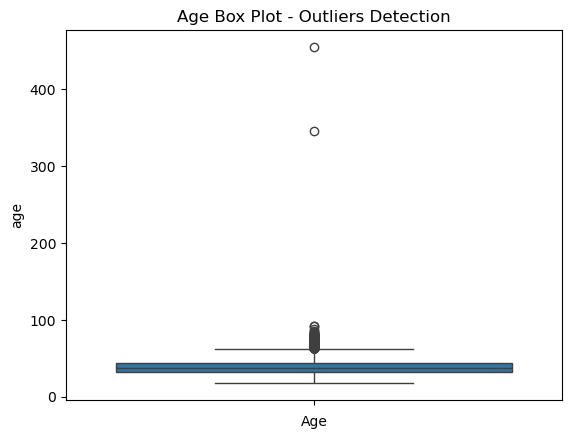

In [235]:
numerics = ["credit_score", "estimated_salaray", "age", "balance"]

sns.boxplot(df["age"])
plt.title('Age Box Plot - Outliers Detection')
plt.xlabel('Age')
plt.show()

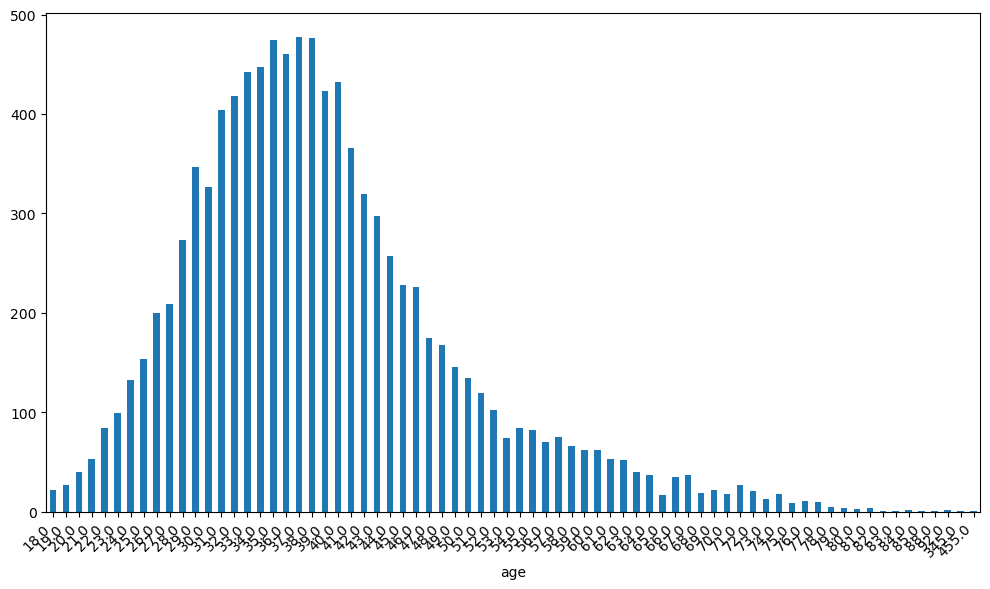

In [236]:
age_counts = df["age"].value_counts().sort_index()
plt.figure(figsize=(10, 6))  
age_counts.plot(kind="bar")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()
plt.show()

<Axes: ylabel='estimated_salary'>

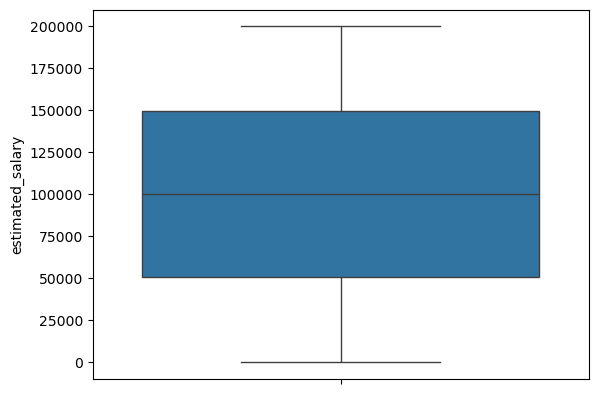

In [237]:
sns.boxplot(df["estimated_salary"])

<Axes: ylabel='credit_score'>

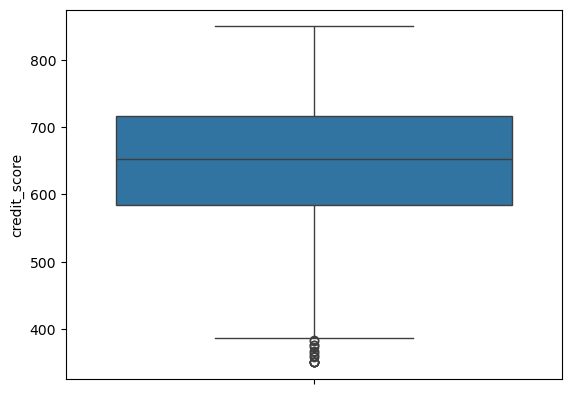

In [238]:
sns.boxplot(df["credit_score"])

In [239]:
df["balance"].min()

0.0

<Axes: ylabel='balance'>

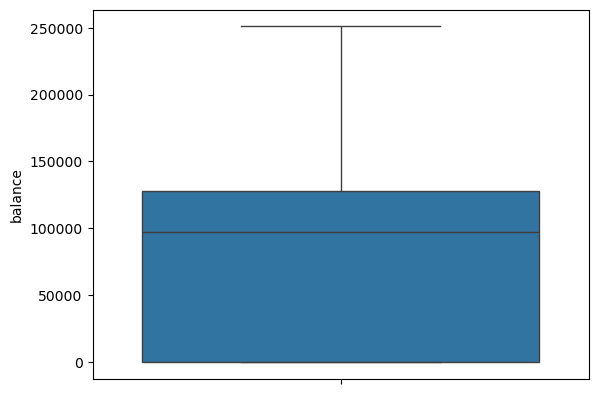

In [240]:
sns.boxplot(df["balance"])

In [241]:
# seems okay
df["age"].min()

18.0

In [242]:
# deleting outliers for age
outliers_age = df["age"] > 120

# deleting unlogical outliers 
df = df[~outliers_age]

**- Credit score, balance and estimated salary are already fine and no more actions have to be taken**

# Train test split

In [253]:
df["products_number"].replace({"np": "0"}, inplace=True)

In [255]:
y = df["churn"]
X = df.drop(columns=["churn"])

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Scaling

In [257]:
df["products_number"].unique()

array(['1', '3', '2', '4', '0'], dtype=object)

In [258]:
# MinMax because there are no negative values
scaler = MinMaxScaler()

numerics = ["credit_score", "estimated_salary", "age", "balance"]

X_train[numerics] = scaler.fit_transform(X_train[numerics])
X_test[numerics] = scaler.transform(X_test[numerics])

In [259]:
le = LabelEncoder()
X_train["products_number"] = le.fit_transform(X_train["products_number"])

In [260]:
X_test["products_number"] = le.transform(X_test["products_number"])

# Model Training

In [261]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.77      0.48      0.59       405

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000

